In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart


---

## For **prepare_data** function

In [3]:
data = prepare_data()
data

,Open,High,Low,Close
Date,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971
...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176


In [4]:
data.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

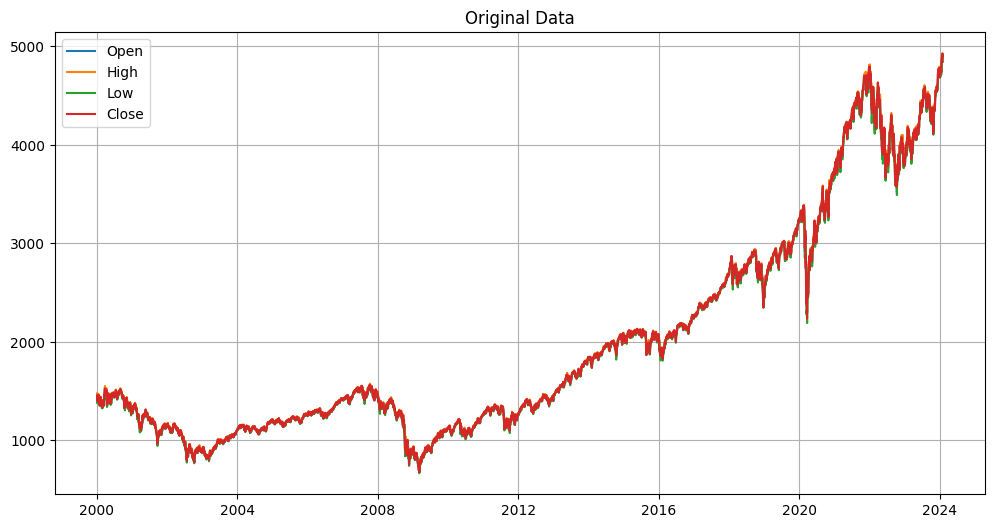

In [5]:
plt = config_chart('Original Data')
plt.plot(data)
plt.legend(['Open', 'High', 'Low', 'Close'])

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Open,High,Low,Close
Date,,,,
2000-01-03,0.248819,0.247831,0.245254,0.246529
2000-01-04,0.246176,0.243528,0.237549,0.236029
2000-01-05,0.235664,0.235605,0.233831,0.236535
2000-01-06,0.236171,0.235347,0.236546,0.236787
2000-01-07,0.236423,0.240931,0.238170,0.243941
...,...,...,...,...
2024-01-25,0.892610,0.893779,0.891165,0.893645
2024-01-26,0.893034,0.895392,0.893449,0.893045
2024-01-29,0.893795,0.899664,0.894565,0.900000


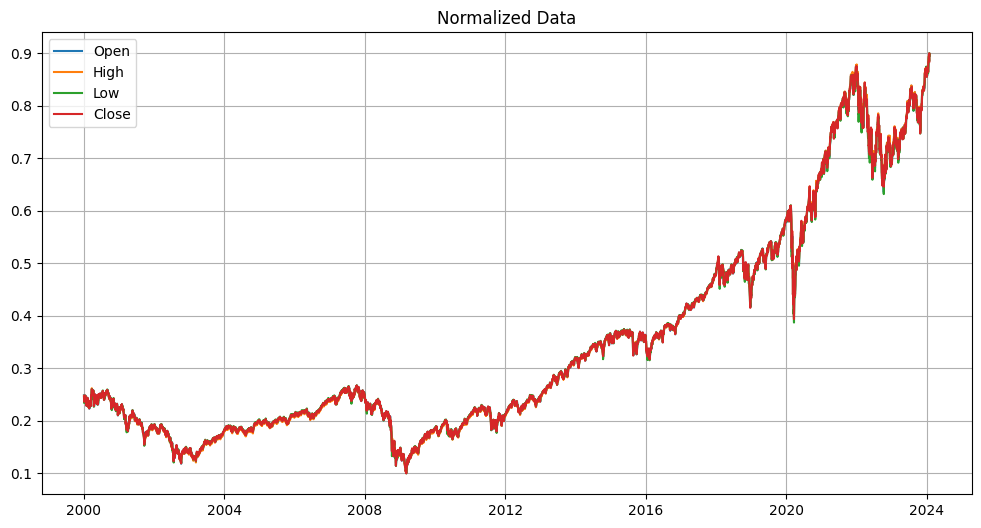

In [7]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)
plt.legend(['Open', 'High', 'Low', 'Close'])

----

## For **prepare_sequences** function

In [8]:
x, y, x_dates, y_dates = prepare_sequences(normalized_data)

In [9]:
x.shape, y.shape, x_dates.shape, y_dates.shape

((6044, 10, 4), (6044, 3, 4), (6044, 10), (6044, 3))

In [10]:
y

array([[[0.24616081, 0.24469359, 0.24719732, 0.24665662],
        [0.24630399, 0.24550948, 0.24528837, 0.24471278],
        [0.24435795, 0.24314302, 0.24548792, 0.24392058]],

       [[0.24630399, 0.24550948, 0.24528837, 0.24471278],
        [0.24435795, 0.24314302, 0.24548792, 0.24392058],
        [0.24356486, 0.24331487, 0.23717068, 0.23642564]],

       [[0.24435795, 0.24314302, 0.24548792, 0.24392058],
        [0.24356486, 0.24331487, 0.23717068, 0.23642564],
        [0.23606147, 0.23579237, 0.23586604, 0.23802512]],

       ...,

       [[0.89296755, 0.89482326, 0.89052494, 0.8888262 ],
        [0.89260964, 0.89377878, 0.891165  , 0.89364538],
        [0.89303351, 0.8953917 , 0.89344865, 0.89304512]],

       [[0.89260964, 0.89377878, 0.891165  , 0.89364538],
        [0.89303351, 0.8953917 , 0.89344865, 0.89304512],
        [0.89379459, 0.89966386, 0.89456496, 0.9       ]],

       [[0.89303351, 0.8953917 , 0.89344865, 0.89304512],
        [0.89379459, 0.89966386, 0.89456496, 0.9 

In [11]:
y[0], y_dates[0]

(array([[0.24616081, 0.24469359, 0.24719732, 0.24665662],
        [0.24630399, 0.24550948, 0.24528837, 0.24471278],
        [0.24435795, 0.24314302, 0.24548792, 0.24392058]]),
 array(['2000-01-19T00:00:00.000000000', '2000-01-20T00:00:00.000000000',
        '2000-01-21T00:00:00.000000000'], dtype='datetime64[ns]'))

In [12]:
x[0], x_dates[0]

(array([[0.24617588, 0.24352829, 0.23754908, 0.2360286 ],
        [0.23566398, 0.23560539, 0.23383098, 0.23653478],
        [0.23617072, 0.23534665, 0.23654565, 0.23678692],
        [0.23642315, 0.24093139, 0.23817032, 0.24394127],
        [0.24358557, 0.24525452, 0.24583996, 0.24697651],
        [0.24662423, 0.244178  , 0.24451275, 0.24339371],
        [0.24303739, 0.24114481, 0.24313092, 0.24220632],
        [0.24184867, 0.24333564, 0.24410422, 0.24548619],
        [0.24513224, 0.24688632, 0.24738558, 0.24839723],
        [0.24804655, 0.24540373, 0.24769055, 0.24651361]]),
 array(['2000-01-04T00:00:00.000000000', '2000-01-05T00:00:00.000000000',
        '2000-01-06T00:00:00.000000000', '2000-01-07T00:00:00.000000000',
        '2000-01-10T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
        '2000-01-12T00:00:00.000000000', '2000-01-13T00:00:00.000000000',
        '2000-01-14T00:00:00.000000000', '2000-01-18T00:00:00.000000000'],
       dtype='datetime64[ns]'))

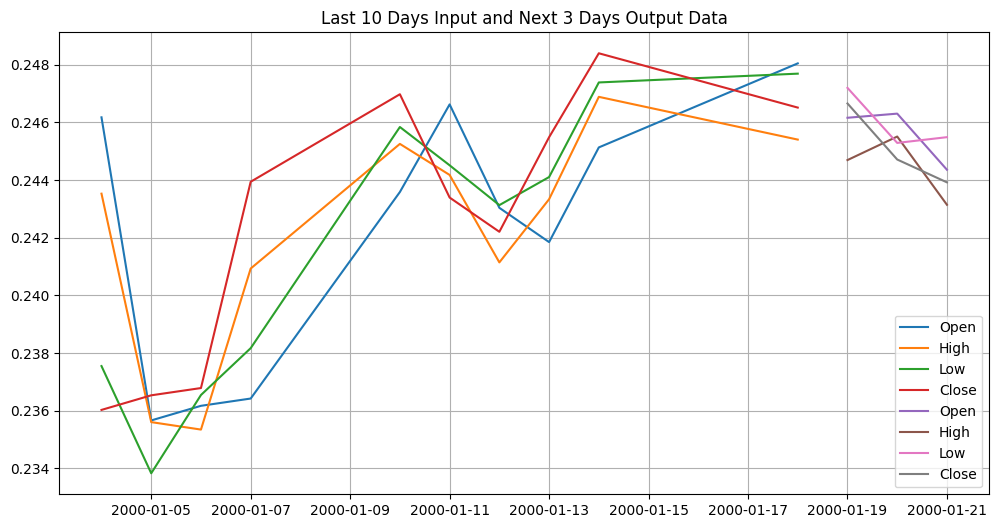

In [13]:
plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
plt.plot(x_dates[0], x[0])
plt.plot(y_dates[0], y[0])
plt.legend(['Open', 'High', 'Low', 'Close', 'Open', 'High', 'Low', 'Close'])


---

## For **split_train_and_test_data** function

In [14]:
train, test, predict = split_train_and_test_data(x, y, x_dates, y_dates)

In [15]:
train['x'].shape,  train['x_dates'].shape, train['y'].shape,  train['y_dates'].shape

((4835, 10, 4), (4835, 10), (4835, 3, 4), (4835, 3))

In [16]:
test['x'].shape, test['x_dates'].shape, test['y'].shape, test['y_dates'].shape

((604, 10, 4), (604, 10), (604, 3, 4), (604, 3))

In [17]:
predict['x'].shape, predict['x_dates'].shape, predict['y'].shape, predict['y_dates'].shape

((605, 10, 4), (605, 10), (605, 3, 4), (605, 3))

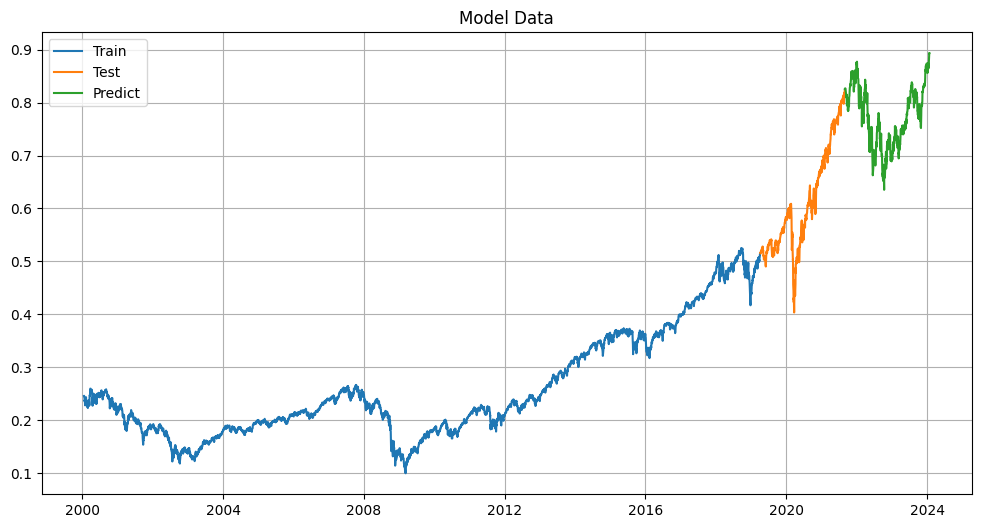

In [18]:
plt = config_chart('Model Data')
plt.plot(train['y_dates'][:, 0], train['y'][:, 0, 0])
plt.plot(test['y_dates'][:, 0], test['y'][:, 0, 0])
plt.plot(predict['y_dates'][:, 0], predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [19]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [20]:
# x_train.shape, y_train.shape

In [21]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [22]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [23]:
# x_test.shape, y_test.shape

In [24]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [25]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [26]:
train, test, predict = get_lstm_data()

In [27]:
print(train['x'].shape) 
print(train['x'][0])

print(train['x_dates'].shape) 
print(train['x_dates'][0])

print(train['y'].shape)
print(train['y'][0])

print(train['y_dates'].shape) 
print(train['y_dates'][0])

(4835, 10, 4)
[[0.24617588 0.24352829 0.23754908 0.2360286 ]
 [0.23566398 0.23560539 0.23383098 0.23653478]
 [0.23617072 0.23534665 0.23654565 0.23678692]
 [0.23642315 0.24093139 0.23817032 0.24394127]
 [0.24358557 0.24525452 0.24583996 0.24697651]
 [0.24662423 0.244178   0.24451275 0.24339371]
 [0.24303739 0.24114481 0.24313092 0.24220632]
 [0.24184867 0.24333564 0.24410422 0.24548619]
 [0.24513224 0.24688632 0.24738558 0.24839723]
 [0.24804655 0.24540373 0.24769055 0.24651361]]
(4835, 10)
['2000-01-04T00:00:00.000000000' '2000-01-05T00:00:00.000000000'
 '2000-01-06T00:00:00.000000000' '2000-01-07T00:00:00.000000000'
 '2000-01-10T00:00:00.000000000' '2000-01-11T00:00:00.000000000'
 '2000-01-12T00:00:00.000000000' '2000-01-13T00:00:00.000000000'
 '2000-01-14T00:00:00.000000000' '2000-01-18T00:00:00.000000000']
(4835, 3, 4)
[[0.24616081 0.24469359 0.24719732 0.24665662]
 [0.24630399 0.24550948 0.24528837 0.24471278]
 [0.24435795 0.24314302 0.24548792 0.24392058]]
(4835, 3)
['2000-01-19T

In [28]:
print(test['x'].shape) 
print(test['x'][0])

print(test['x_dates'].shape) 
print(test['x_dates'][0])

print(test['y'].shape)
print(test['y'][0])

print(test['y_dates'].shape) 
print(test['y_dates'][0])

(604, 10, 4)
[[0.50189795 0.5031522  0.5023457  0.50305403]
 [0.50322797 0.50233818 0.49928273 0.50059087]
 [0.50128381 0.5012333  0.50136299 0.50248574]
 [0.50483867 0.50431559 0.50521475 0.5060535 ]
 [0.50867418 0.51061801 0.51074953 0.51222371]
 [0.51236844 0.51127904 0.51265472 0.51223313]
 [0.51384728 0.51361155 0.51386333 0.51339226]
 [0.51345165 0.51286176 0.51423419 0.51451941]
 [0.51536752 0.51512058 0.5172181  0.51703154]
 [0.51617759 0.5156324  0.51680206 0.51760171]]
(604, 10)
['2019-03-26T00:00:00.000000000' '2019-03-27T00:00:00.000000000'
 '2019-03-28T00:00:00.000000000' '2019-03-29T00:00:00.000000000'
 '2019-04-01T00:00:00.000000000' '2019-04-02T00:00:00.000000000'
 '2019-04-03T00:00:00.000000000' '2019-04-04T00:00:00.000000000'
 '2019-04-05T00:00:00.000000000' '2019-04-08T00:00:00.000000000']
(604, 3, 4)
[[0.51582344 0.51391937 0.51539955 0.5142955 ]
 [0.51484196 0.51445388 0.51649141 0.51617911]
 [0.51682939 0.51515456 0.51702985 0.51619983]]
(604, 3)
['2019-04-09T00:0

In [29]:
print(predict['x'].shape) 
print(predict['x'][0])

print(predict['x_dates'].shape) 
print(predict['x_dates'][0])

print(predict['y'].shape)
print(predict['y'][0])

print(predict['y_dates'].shape) 
print(predict['y_dates'][0])

(605, 10, 4)
[[0.81263243 0.81142782 0.80616453 0.80970502]
 [0.80864239 0.80995462 0.80235414 0.80070845]
 [0.79762183 0.80321024 0.79673277 0.801749  ]
 [0.80291926 0.80807168 0.80408799 0.8084988 ]
 [0.81040381 0.81667068 0.81227539 0.81562302]
 [0.81682962 0.81722409 0.81829772 0.81688382]
 [0.81796941 0.81890498 0.81893411 0.81875801]
 [0.81859104 0.81780766 0.81579586 0.81382977]
 [0.81488928 0.82109962 0.81675783 0.82123817]
 [0.82236059 0.82563801 0.82422409 0.82489248]]
(605, 10)
['2021-08-17T00:00:00.000000000' '2021-08-18T00:00:00.000000000'
 '2021-08-19T00:00:00.000000000' '2021-08-20T00:00:00.000000000'
 '2021-08-23T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-25T00:00:00.000000000' '2021-08-26T00:00:00.000000000'
 '2021-08-27T00:00:00.000000000' '2021-08-30T00:00:00.000000000']
(605, 3, 4)
[[0.82537292 0.82451054 0.82460815 0.82374277]
 [0.82519392 0.8255908  0.82577915 0.82400803]
 [0.82626398 0.82724152 0.82627618 0.82642801]]
(605, 3)
['2021-08-31T00:0